# Tiling experiments
This paperwork will analyze data obtained from tiling experiments to compare 4 features of 4 different algorithms' implementations.

The features or variables to measure are the following:
- Algorithm speed up
- Cache misses
- Total of instructions executed
- Cores rate usage

The 4 algorithms selected for the experiment were:
- Matrix multiplication
- Vector multiplication
- Jacobi Example
- ? (still in process)

For each algorithm will have 4 versions
- Original implementation.
- Tiled and handed parallelized algorithm from a benchmark.
- Tiled and parallelized algorithm using Cetus.
- Tiled, parallelized and loop interchange applied algorithm using Cetus.

## Methodology

The proposed methodology is, we will have 4 different versions for each algorithm and will measure the features above for each of them. After that, we are going to use the data obtained to see if tiling improves the algorithms' performance.

For each measurement the independent variable will be the amount ofcores to use for each experiment instance.

## Data creation
For obtaining/creating the data, we will use a group of tools to obtain data in runtime. Those tools are the following:
- PAPI: To access hardware counters and to measure: Cache misses and total of instructions executed
- OMP directives: To measure elapsed time for an algorithm execution and to measure speed up and cores rate usage.

## Experiment results

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

default_tick_format_style = 'sci'
all_versions = ['parallel-non-tiled','parallel-paw-tiled', 'parallel-paw-single-tiled']

In [2]:
df = pd.read_csv("./experiments/results.csv", names=['algorithm','version', 'cores', 'experiment', 'N','M','value'])
df

,algorithm,version,cores,experiment,N,M,value
0,matrix-mult,parallel-paw-single-tiled,1,cache-misses,1200,1200,3.512904e+06
1,matrix-mult,parallel-non-tiled,1,cache-misses,1200,1200,5.786197e+06
2,matrix-mult,parallel-paw-tiled,1,cache-misses,1200,1200,5.912374e+06
3,vector-mult,parallel-paw-single-tiled,1,cache-misses,1200,1200,1.445540e+05
4,vector-mult,parallel-non-tiled,1,cache-misses,1200,1200,1.443550e+05
...,...,...,...,...,...,...,...
1075,vector-mult,parallel-non-tiled,8,speed-up,1200,1200,9.830000e-04
1076,vector-mult,parallel-paw-tiled,8,speed-up,1200,1200,1.130000e-03
1077,jacobi,parallel-paw-single-tiled,8,speed-up,1200,1200,5.491000e-03
1078,jacobi,parallel-non-tiled,8,speed-up,1200,1200,3.245000e-03


In [37]:
pp = pd.read_csv("./experiments/test.csv", names=['algorithm','version', 'cores', 'experiment', 'N','M','value'])
pp

,algorithm,version,cores,experiment,N,M,value
0,matrix-mult,parallel-non-tiled,5,cache-misses,1200,1200,5
1,matrix-mult,parallel-non-tiled,5,cache-misses,1200,1200,7
2,matrix-mult,parallel-non-tiled,5,total-i,1200,1200,1
3,matrix-mult,parallel-non-tiled,5,total-i,1200,1200,3
4,matrix-mult,parallel-non-tiled,4,cache-misses,1200,1200,2


In [4]:
def group_by(dataframe, groups=['algorithm', "version", "cores", "experiment"]):
    return dataframe.groupby(groups, as_index=False)

In [36]:
def group_min(dataframe):
    ss = group_by(dataframe, ['algorithm', "version", "cores", "experiment"])
    return ss.min()

group_min(pp)
group_by(pp).std()

,algorithm,version,cores,experiment,N,M,value
0,matrix-mult,parallel-non-tiled,4,cache-misses,NaN,NaN,NaN
1,matrix-mult,parallel-non-tiled,5,cache-misses,0.0,0.0,1.414214
2,matrix-mult,parallel-non-tiled,5,total-i,0.0,0.0,1.414214


In [6]:
def group_mean(dataframe):
    ss = group_by(dataframe, ['algorithm', "version", "cores", "experiment"])
    return ss.mean()

group_mean(pp)


,algorithm,version,cores,experiment,N,M,value
0,matrix-mult,parallel-non-tiled,4,cache-misses,1200.0,1200.0,2.0
1,matrix-mult,parallel-non-tiled,5,cache-misses,1200.0,1200.0,6.0
2,matrix-mult,parallel-non-tiled,5,total-i,1200.0,1200.0,2.0


In [7]:
def filter_by_experiment(algorithm, experiment)->pd.DataFrame:
    filteredAlgorithms = df.loc[(df['algorithm']==algorithm)]
    filteredRows = filteredAlgorithms.loc[df['experiment']==experiment]
    return filteredRows

filter_by_experiment('matrix-mult', 'speed-up').head()
    

,algorithm,version,cores,experiment,N,M,value
144,matrix-mult,parallel-paw-single-tiled,1,speed-up,1200,1200,7.998379
145,matrix-mult,parallel-non-tiled,1,speed-up,1200,1200,8.128965
146,matrix-mult,parallel-paw-tiled,1,speed-up,1200,1200,8.771274
153,matrix-mult,parallel-paw-single-tiled,2,speed-up,1200,1200,4.161093
154,matrix-mult,parallel-non-tiled,2,speed-up,1200,1200,4.243676


In [8]:
def get_unique(dataframe: pd.DataFrame, name):
    return dataframe[name].unique()

get_unique(df, 'version')

array(['parallel-paw-single-tiled', 'parallel-non-tiled',
       'parallel-paw-tiled'], dtype=object)

In [9]:
def get_experimental_values(dataframe: pd.DataFrame, versions=[])->dict:
    if(len(versions) == 0):
        versions=get_unique(dataframe, 'version')
    dictionary={}
    for version in versions:
        dataframe_by_versions = dataframe.loc[dataframe['version']==version]
        x = dataframe_by_versions['cores']
        y = dataframe_by_versions['value']
        dictionary[version] = {'x': x, 'y':y}
    return dictionary
matrix_mult_speed_df = filter_by_experiment('matrix-mult','speed-up')
experiment = get_experimental_values(matrix_mult_speed_df)
experiment.keys()

dict_keys(['parallel-paw-single-tiled', 'parallel-non-tiled', 'parallel-paw-tiled'])

In [10]:
matrix_mult_speed_df = filter_by_experiment('matrix-mult','speed-up')
experiment = get_experimental_values(matrix_mult_speed_df, ['parallel-paw-single-tiled','parallel-non-tiled'])
experiment.keys()

dict_keys(['parallel-paw-single-tiled', 'parallel-non-tiled'])

In [11]:
def get_plottable_experiment(experiment: dict)->dict:
    colors = ['b','g','r','c','m','y','k']
    colors.reverse()
    dictionary = {}
    for version in experiment:
        x=experiment[version]['x']
        y=experiment[version]['y']
        dictionary[version]={'x':x, 'y':y ,'color':colors.pop()}
    return dictionary

matrix_mult_speed_df = filter_by_experiment('matrix-mult','speed-up')
experiment = get_experimental_values(matrix_mult_speed_df)
plottable_experiment = get_plottable_experiment(experiment)
plottable_experiment['parallel-non-tiled']['x'].head()

145    1
154    2
163    3
172    4
181    5
Name: cores, dtype: int64

In [12]:
def plot_scatter(experiment, versions=all_versions,tick_format_style=default_tick_format_style ):
    
    fig=plt.figure(figsize=(25, 8))
        
    gg=0
    min_y = 0
    max_y = 0
    
    
    for version in versions:
        canva = fig.add_subplot(131+gg)
        gg+=1
        canva.title.set_text(version)
        x = exp[version]['x']
        y = exp[version]['y']
        
        max_y = max(max_y, y.max())
        min_y = min(min_y, y.min())
        
        #plt.ylim([min_y, max_y])

        c = exp[version]
        plt.plot(x, y, 'o')
        m, b = np.polyfit(x, y, 1)

        plt.ticklabel_format(style=tick_format_style, axis='y', scilimits=(0,0))
        plt.plot(x, m*x+b)
    

    plt.show()

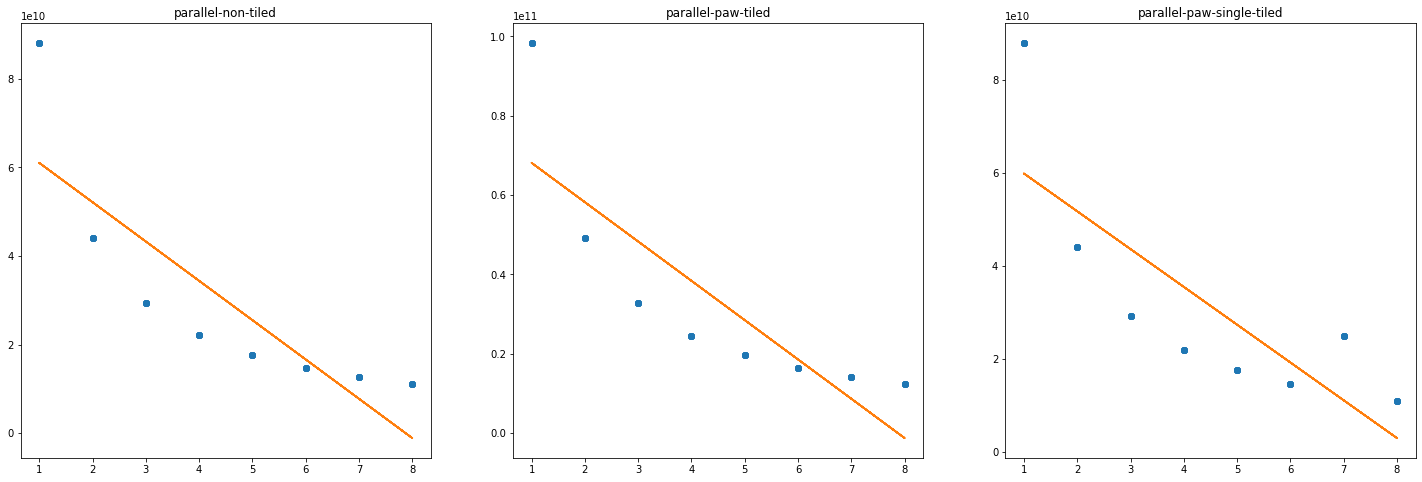

In [13]:
fdf = filter_by_experiment('matrix-mult', 'total-instructions')
exp = get_experimental_values(fdf)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp)


In [14]:
def plot_lines(dataframe: pd.DataFrame, versions=[], canva=None, title="", tick_format_style=default_tick_format_style):
    
    if(canva==None):
        fig=plt.figure(figsize=(20, 10))
        canva = fig.add_subplot()
        
    
    canva.title.set_text(title)

    plt.ylabel('Values')
    plt.xlabel('# Cores')
    
    
    aux_experiment = get_experimental_values(dataframe,versions)
    experiment = get_plottable_experiment(aux_experiment)
    
       
    x_min=0
    x_max=10
    
    y_min=0
    y_max=10
    
    plt.ticklabel_format(style=tick_format_style, axis='y', scilimits=(0,0))
 
    
    # lines
    for version in experiment.keys():
        color = experiment[version]['color']
        x = experiment[version]['x']
        x_min = x.min()
        x_max = x.max()
        
        y = experiment[version]['y']
        y_min= y.min()
        y_max= y.max()
    
        line, = plt.plot(x, y, color)
        line.set_label(version)
        
    # axh lines
    for version in experiment.keys():
        color = experiment[version]['color']
        y = experiment[version]['y']
        plt.axhline(y=y.min(), color=color, linestyle=":", label='min-'+version)
        plt.legend()
    
#     x_min=x_min-x_min*0.05
#     x_max=x_max+x_max*0.05
    
#     y_min=y_min-y_min*0.1    
#     y_max=y_max+y_max*0.1
    
#     x_lim=[x_min, x_max]
#     y_lim=[y_min, y_max]
    
#     print(str(x_lim))
#     print(str(y_lim))
#     plt.xlim(x_lim)
#     plt.ylim(y_lim)

In [15]:
def plot_bars(dataframe: pd.DataFrame, versions=[], canva=None, tick_format_style=default_tick_format_style):
    
    if(canva==None):
        fig=plt.figure(figsize=(20, 10))
        canva = fig.add_subplot()
    
    # bars
    aux_experiment = get_experimental_values(dataframe,versions)
    experiment = get_plottable_experiment(aux_experiment)
    experiment_keys = list(experiment.keys())
    min_execution_time_version = experiment_keys[0]
    min_execution_time = experiment[min_execution_time_version]['y'].min()
    for version in experiment_keys:
        cur_experiment_time = experiment[version]['y'].min()
        if min_execution_time > cur_experiment_time:
            min_execution_time = cur_experiment_time
            min_execution_time_version = version
        
    version_filtered_df = dataframe.loc[dataframe['version'] == min_execution_time_version]
    cores_df = version_filtered_df.loc[dataframe['value'] == min_execution_time]
    cores_with_min_execution_time = cores_df['cores'].values[0]
    bars_df = dataframe.loc[dataframe['cores']==cores_with_min_execution_time] 
        

    names=[]
    colors=[]
    values=[]
    for version in experiment_keys:
        names.append(version)
        
        val = bars_df.loc[bars_df['version']==version]['value'].values[0]
        values.append(val)
        
        color = experiment[version]['color']
        colors.append(color)


    plt.ticklabel_format(style=tick_format_style, axis='y', scilimits=(0,0))
    
    canva.title.set_text('Bar chart - Cores: '+str(cores_with_min_execution_time))
    
    
    plt.bar(names, values, color=colors)
    
    plt.ylabel('Values')
    plt.xlabel('Versions')



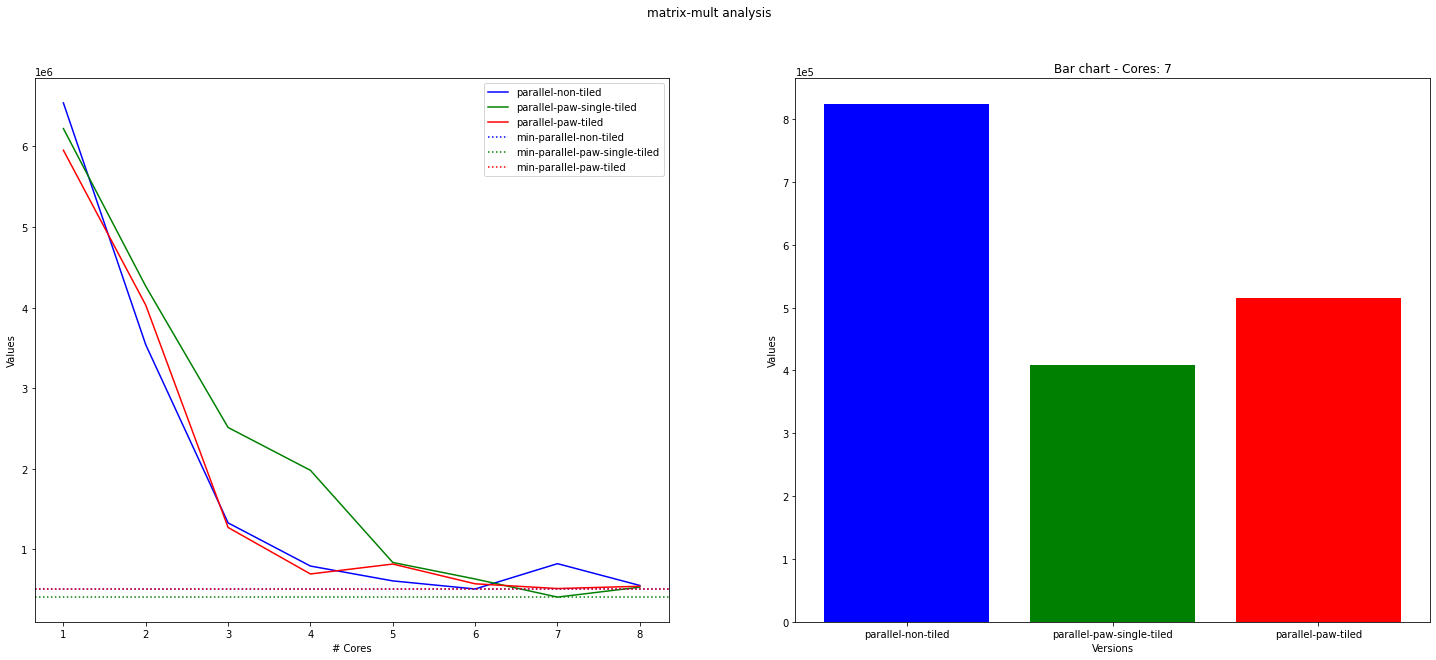

In [16]:
def plot_experiments(experiment_label, dataframe: pd.DataFrame, versions=[], tick_format_style=default_tick_format_style):
    
    fig=plt.figure(figsize=(25, 10))
    
        
    plt.suptitle(experiment_label+' analysis')
    
    canva = fig.add_subplot(121)
    plot_lines(dataframe, versions, canva, tick_format_style=tick_format_style)
    
    canva2 = fig.add_subplot(122)
    plot_bars(dataframe, versions, canva2, tick_format_style=tick_format_style)
    
    plt.show()
    
matrix_mult_speed_df = filter_by_experiment('matrix-mult','cache-misses')
plot_experiments('matrix-mult', group_mean(matrix_mult_speed_df))

In [17]:
def plot_bars_group(dataframe: pd.DataFrame, experiments=[]):
    if(len(experiments) == 0):
        experiments=get_unique(dataframe, 'experiment')
    
    return experiments

plot_bars_group(df)
    

array(['cache-misses', 'total-instructions', 'speed-up'], dtype=object)

# Matrix multiplication

## Analysis

### Cache misses

Now, we are going to analyze the cache misses for the **matrix multiplication** algorithm.

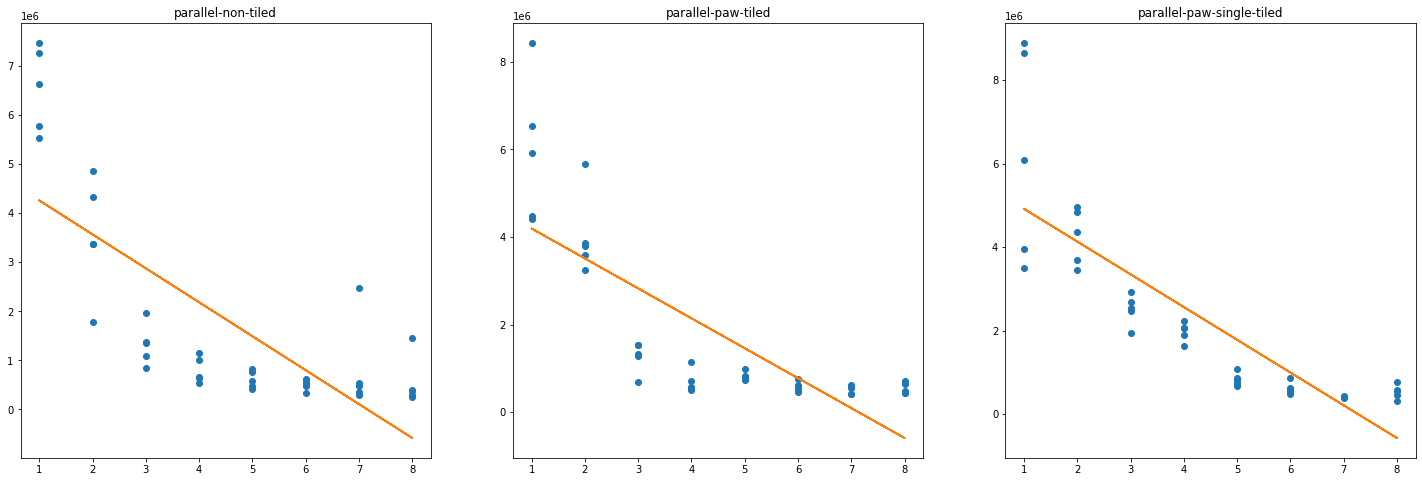

In [18]:
df_mm_cache = filter_by_experiment('matrix-mult','cache-misses')
exp = get_experimental_values(df_mm_cache)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

In [31]:
df_std_mm_cache = group_by(df_mm_cache)
df_std_mm_cache = df_std_mm_cache.std()
df_std_mm_cache

,algorithm,version,cores,experiment,N,M,value
0,matrix-mult,parallel-non-tiled,1,cache-misses,0.0,0.0,8.611298e+05
1,matrix-mult,parallel-non-tiled,2,cache-misses,0.0,0.0,1.176533e+06
2,matrix-mult,parallel-non-tiled,3,cache-misses,0.0,0.0,4.169985e+05
3,matrix-mult,parallel-non-tiled,4,cache-misses,0.0,0.0,2.635265e+05
4,matrix-mult,parallel-non-tiled,5,cache-misses,0.0,0.0,1.795110e+05
5,matrix-mult,parallel-non-tiled,6,cache-misses,0.0,0.0,1.140041e+05
6,matrix-mult,parallel-non-tiled,7,cache-misses,0.0,0.0,9.332938e+05
7,matrix-mult,parallel-non-tiled,8,cache-misses,0.0,0.0,5.020165e+05
8,matrix-mult,parallel-paw-single-tiled,1,cache-misses,0.0,0.0,2.530025e+06
9,matrix-mult,parallel-paw-single-tiled,2,cache-misses,0.0,0.0,6.781006e+05


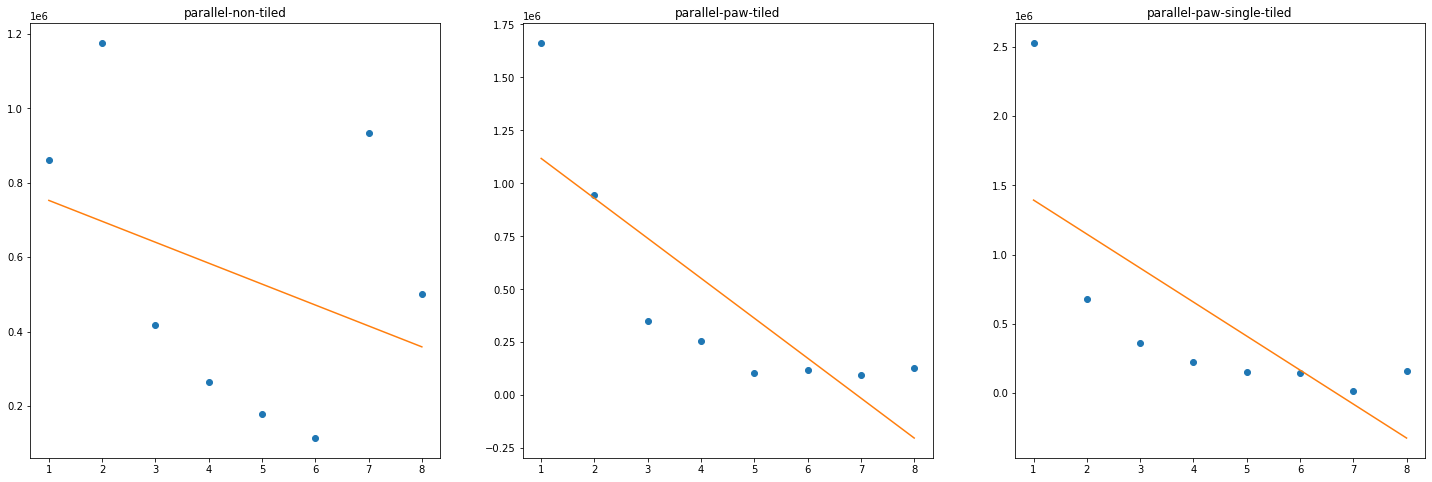

In [32]:
exp = get_experimental_values(df_std_mm_cache)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

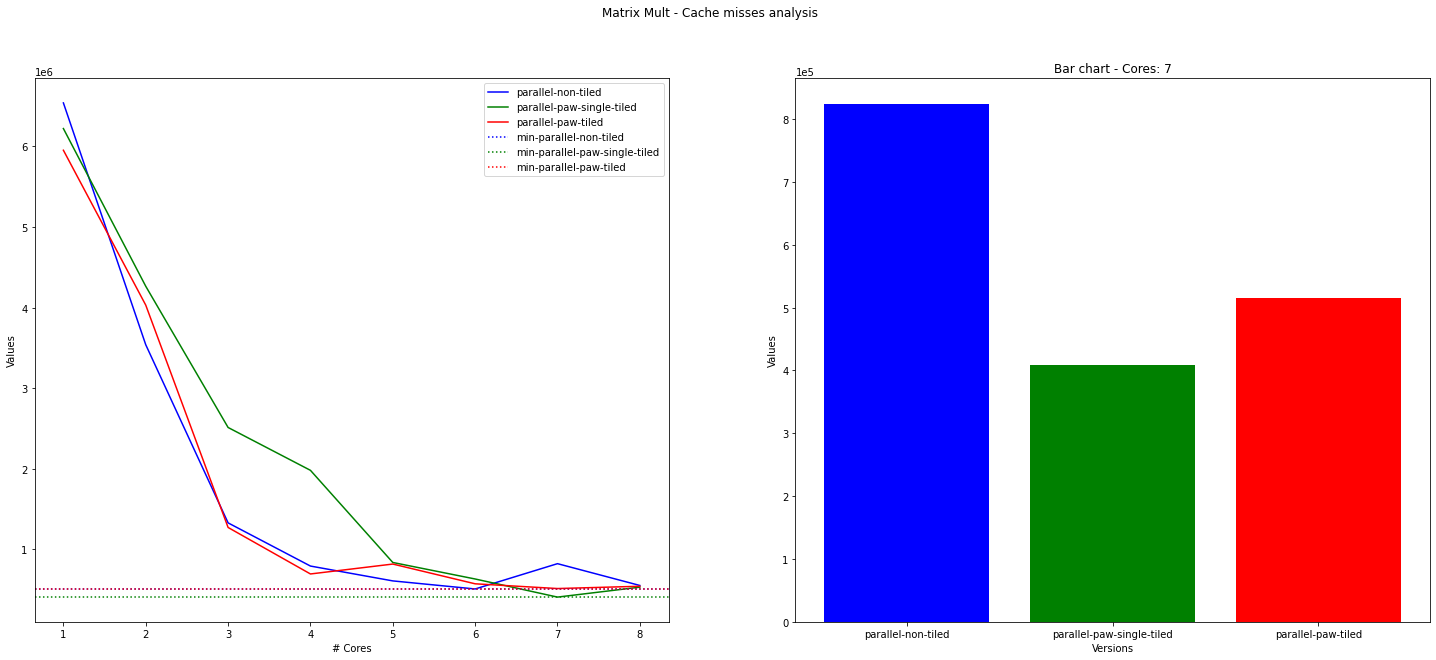

In [19]:
plot_experiments('Matrix Mult - Cache misses',group_mean(df_mm_cache))

### Total of instructions executed

In [24]:
df_mm_ti = filter_by_experiment('matrix-mult','total-instructions')
df_mm_ti

,algorithm,version,cores,experiment,N,M,value
72,matrix-mult,parallel-non-tiled,1,total-instructions,1200,1200,8.814241e+10
73,matrix-mult,parallel-paw-tiled,1,total-instructions,1200,1200,9.843843e+10
74,matrix-mult,parallel-paw-single-tiled,1,total-instructions,1200,1200,8.807761e+10
81,matrix-mult,parallel-non-tiled,2,total-instructions,1200,1200,4.407122e+10
82,matrix-mult,parallel-paw-tiled,2,total-instructions,1200,1200,4.919043e+10
...,...,...,...,...,...,...,...
991,matrix-mult,parallel-paw-tiled,7,total-instructions,1200,1200,1.406561e+10
992,matrix-mult,parallel-paw-single-tiled,7,total-instructions,1200,1200,2.497618e+10
999,matrix-mult,parallel-non-tiled,8,total-instructions,1200,1200,1.101782e+10
1000,matrix-mult,parallel-paw-tiled,8,total-instructions,1200,1200,1.225443e+10


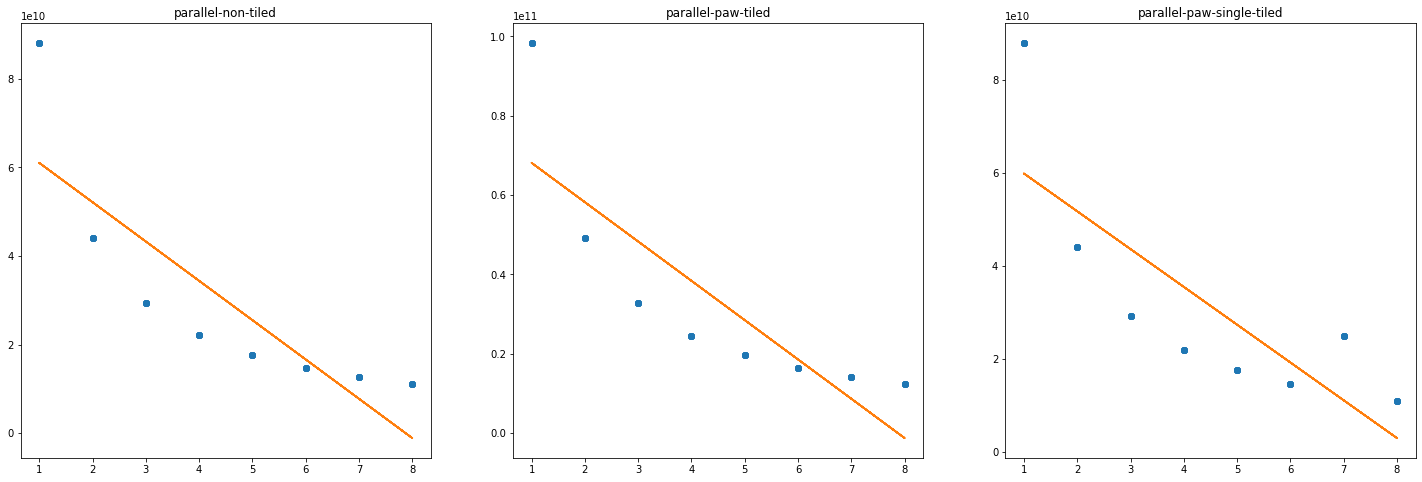

In [25]:
exp = get_experimental_values(df_mm_ti)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

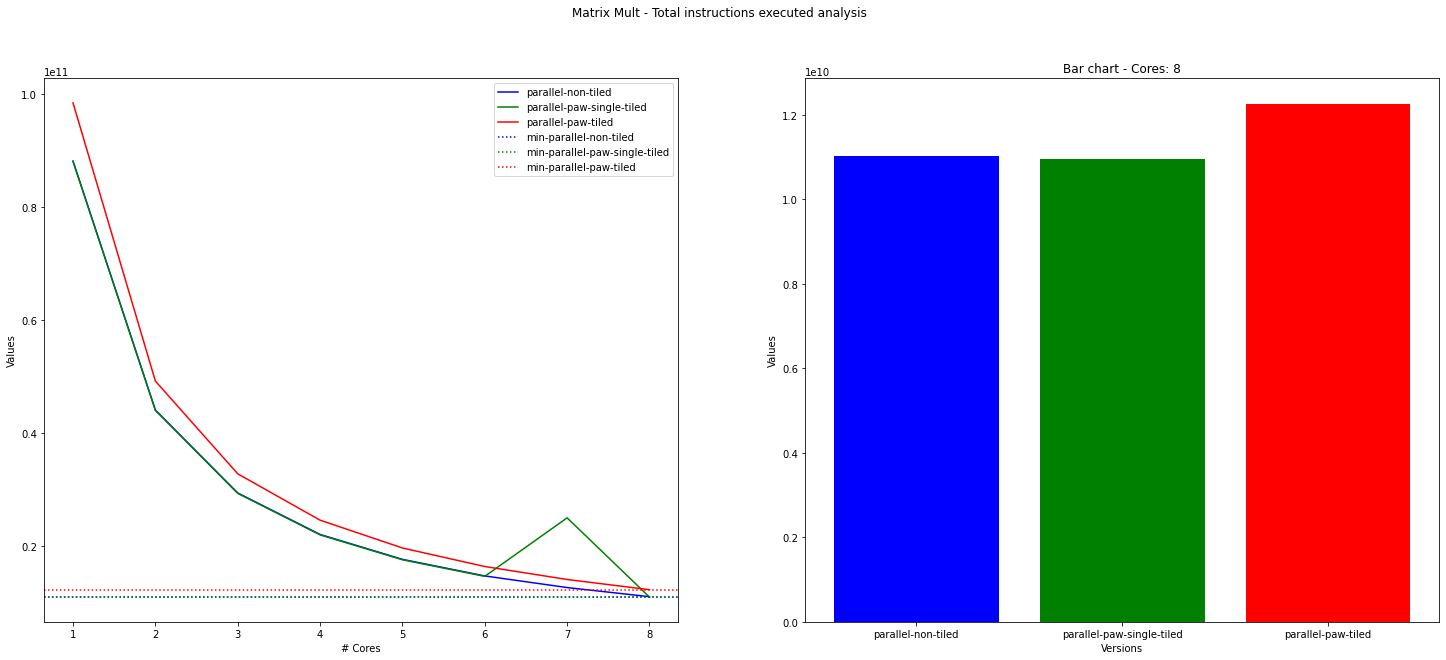

In [26]:
plot_experiments('Matrix Mult - Total instructions executed',group_mean(df_mm_ti))

### Execution time

First we are going to take a look at the scattered behaviour of the execution times took from matrix multiplication's experiments.

In [23]:
df_mm_ex = filter_by_experiment('matrix-mult','speed-up')
df_mm_ex

,algorithm,version,cores,experiment,N,M,value
144,matrix-mult,parallel-paw-single-tiled,1,speed-up,1200,1200,7.998379
145,matrix-mult,parallel-non-tiled,1,speed-up,1200,1200,8.128965
146,matrix-mult,parallel-paw-tiled,1,speed-up,1200,1200,8.771274
153,matrix-mult,parallel-paw-single-tiled,2,speed-up,1200,1200,4.161093
154,matrix-mult,parallel-non-tiled,2,speed-up,1200,1200,4.243676
...,...,...,...,...,...,...,...
1063,matrix-mult,parallel-non-tiled,7,speed-up,1200,1200,2.292823
1064,matrix-mult,parallel-paw-tiled,7,speed-up,1200,1200,1.972979
1071,matrix-mult,parallel-paw-single-tiled,8,speed-up,1200,1200,2.347165
1072,matrix-mult,parallel-non-tiled,8,speed-up,1200,1200,2.270592


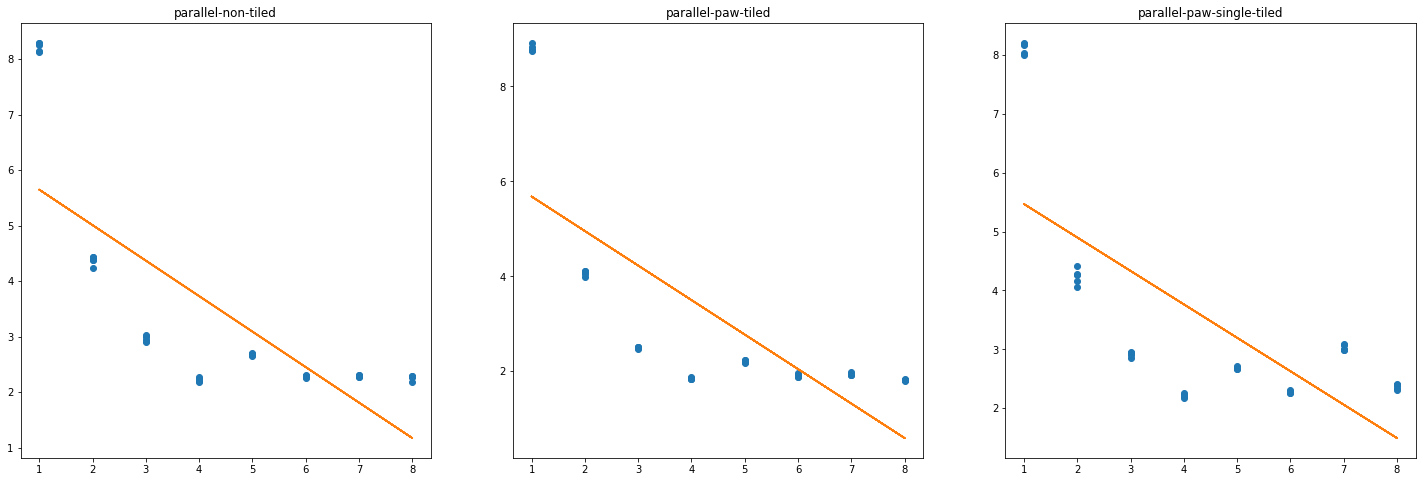

In [131]:
exp = get_experimental_values(df_mm_ex)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

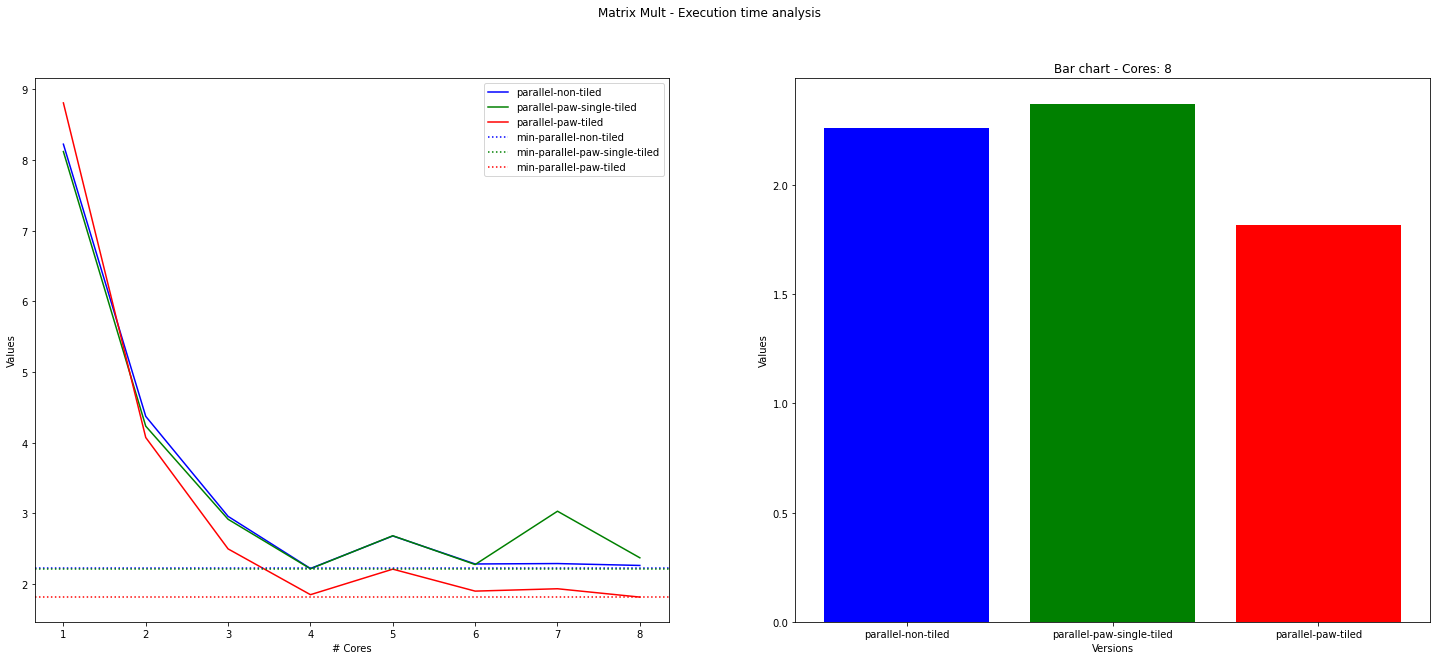

In [132]:
plot_experiments('Matrix Mult - Execution time',group_mean(df_mm_ex))

#### Observations
Unexpectedly, the **paw tiled** *(multi tiling)* version got the best performance and the the **single tiled** version got the worst performance. Due to these observations, one can suppose the following:
- paw single tiled version is not splitting the data in the best possible way, so the cache misses get increased and then the performance get decreased.
- In contrast, paw tiled version (multi-tiled version) is splitting the data in a better way and performance and cache hits get increased.


# Matrix-vector multiplication

## Analysis

### Cache misses

In [34]:
df_vm_cache = filter_by_experiment('vector-mult','cache-misses')
df_vm_cache

,algorithm,version,cores,experiment,N,M,value
3,vector-mult,parallel-paw-single-tiled,1,cache-misses,1200,1200,144554.0
4,vector-mult,parallel-non-tiled,1,cache-misses,1200,1200,144355.0
5,vector-mult,parallel-paw-tiled,1,cache-misses,1200,1200,83092.0
12,vector-mult,parallel-paw-single-tiled,2,cache-misses,1200,1200,106771.0
13,vector-mult,parallel-non-tiled,2,cache-misses,1200,1200,73299.0
...,...,...,...,...,...,...,...
922,vector-mult,parallel-non-tiled,7,cache-misses,1200,1200,21572.0
923,vector-mult,parallel-paw-tiled,7,cache-misses,1200,1200,35497.0
930,vector-mult,parallel-paw-single-tiled,8,cache-misses,1200,1200,32281.0
931,vector-mult,parallel-non-tiled,8,cache-misses,1200,1200,16408.0


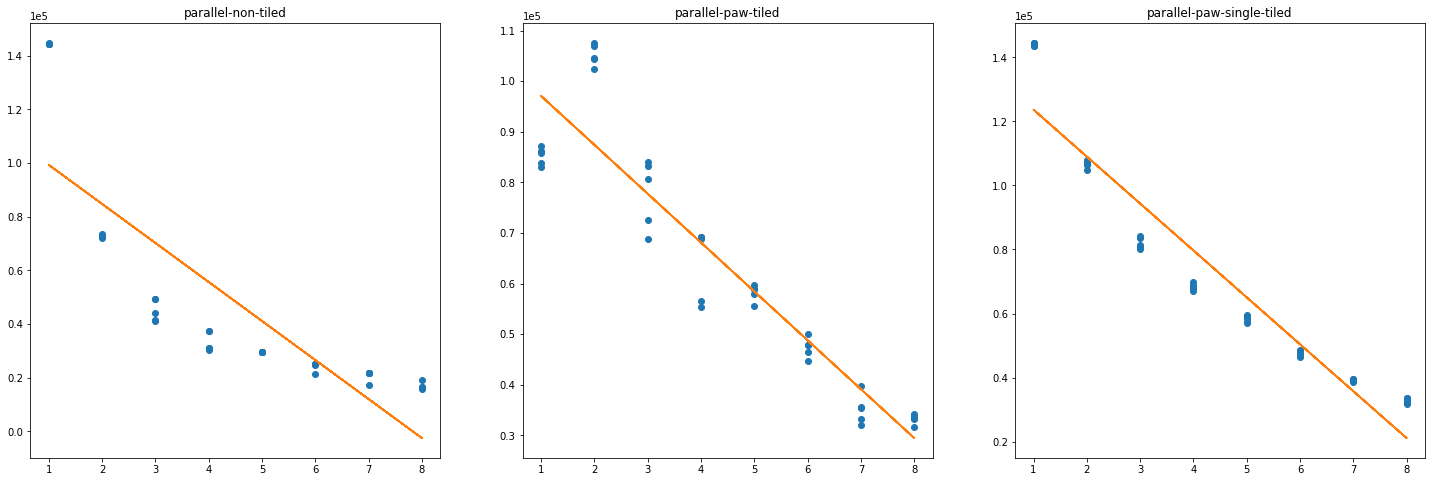

In [35]:
exp = get_experimental_values(df_vm_cache)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

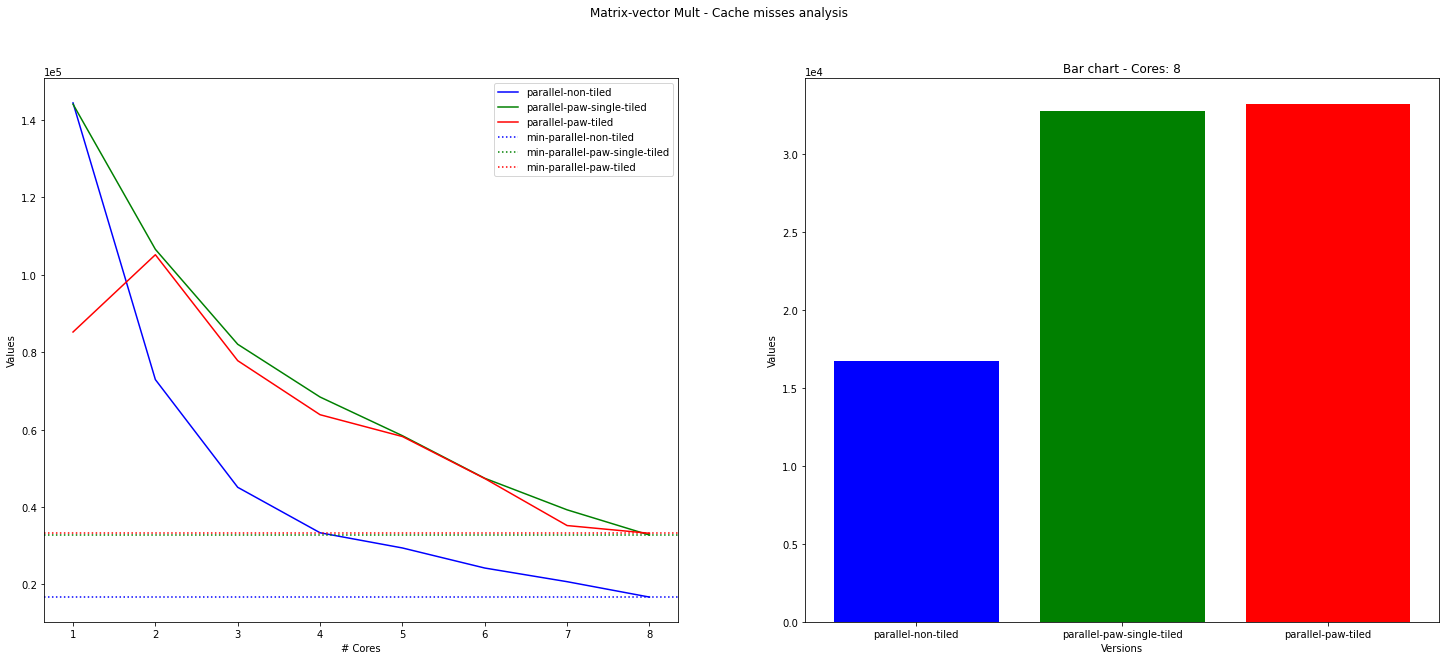

In [139]:
plot_experiments('Matrix-vector Mult - Cache misses',group_mean(df_vm_cache))

### Total of instructions executed

In [140]:
df_vm_ti = filter_by_experiment('vector-mult','total-instructions')
df_vm_ti

,algorithm,version,cores,experiment,N,M,value
75,vector-mult,parallel-non-tiled,1,total-instructions,1200,1200,50412035.0
76,vector-mult,parallel-paw-tiled,1,total-instructions,1200,1200,59011263.0
77,vector-mult,parallel-paw-single-tiled,1,total-instructions,1200,1200,59011262.0
84,vector-mult,parallel-non-tiled,2,total-instructions,1200,1200,25218812.0
85,vector-mult,parallel-paw-tiled,2,total-instructions,1200,1200,29502606.0
...,...,...,...,...,...,...,...
994,vector-mult,parallel-paw-tiled,7,total-instructions,1200,1200,8457034.0
995,vector-mult,parallel-paw-single-tiled,7,total-instructions,1200,1200,8456433.0
1002,vector-mult,parallel-non-tiled,8,total-instructions,1200,1200,6324147.0
1003,vector-mult,parallel-paw-tiled,8,total-instructions,1200,1200,7373341.0


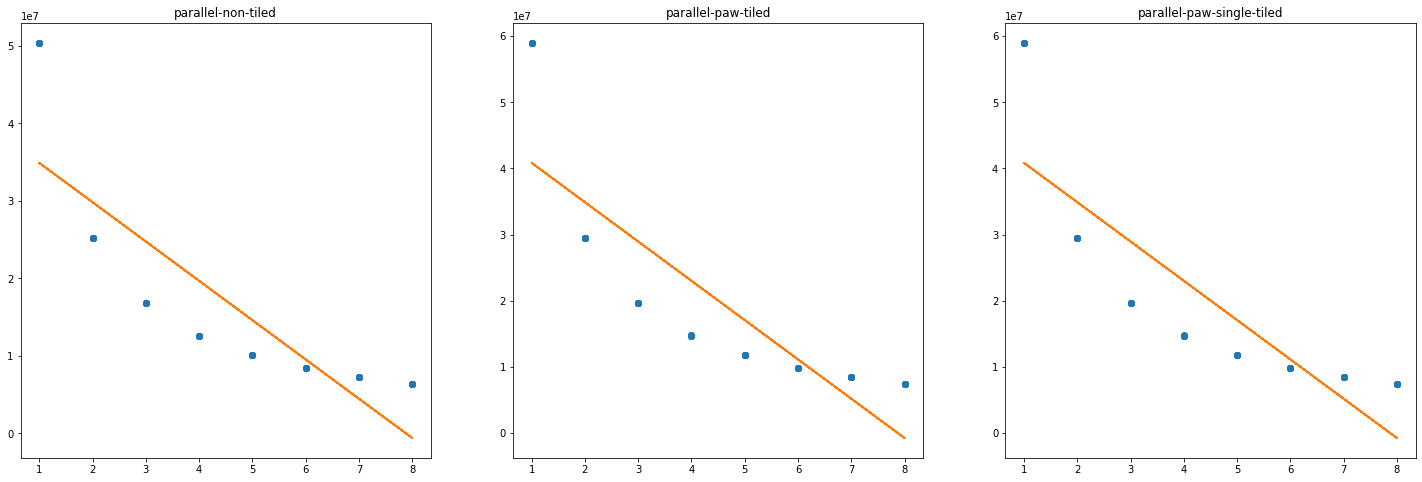

In [141]:
exp = get_experimental_values(df_vm_ti)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

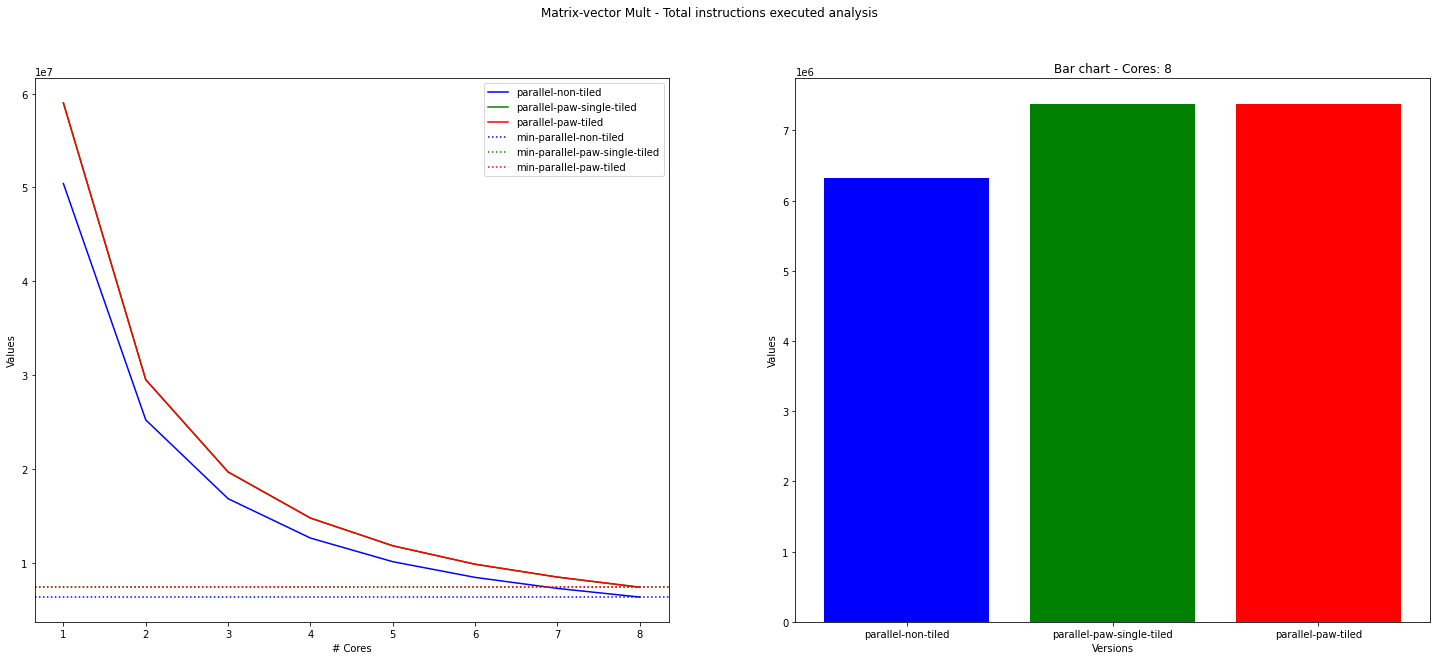

In [142]:
plot_experiments('Matrix-vector Mult - Total instructions executed',group_mean(df_vm_ti))

### Execution time

In [143]:
df_vm_ex = filter_by_experiment('vector-mult','speed-up')
df_vm_ex

,algorithm,version,cores,experiment,N,M,value
147,vector-mult,parallel-paw-single-tiled,1,speed-up,1200,1200,0.003745
148,vector-mult,parallel-non-tiled,1,speed-up,1200,1200,0.003297
149,vector-mult,parallel-paw-tiled,1,speed-up,1200,1200,0.003756
156,vector-mult,parallel-paw-single-tiled,2,speed-up,1200,1200,0.001989
157,vector-mult,parallel-non-tiled,2,speed-up,1200,1200,0.001709
...,...,...,...,...,...,...,...
1066,vector-mult,parallel-non-tiled,7,speed-up,1200,1200,0.001094
1067,vector-mult,parallel-paw-tiled,7,speed-up,1200,1200,0.001258
1074,vector-mult,parallel-paw-single-tiled,8,speed-up,1200,1200,0.001136
1075,vector-mult,parallel-non-tiled,8,speed-up,1200,1200,0.000983


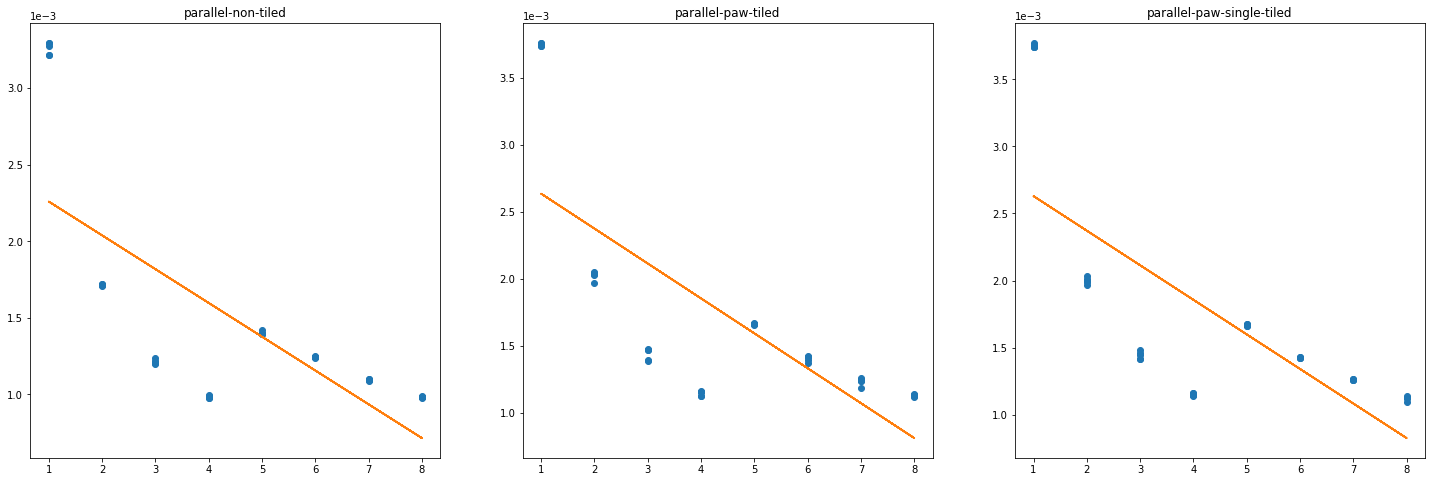

In [144]:
exp = get_experimental_values(df_vm_ex)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

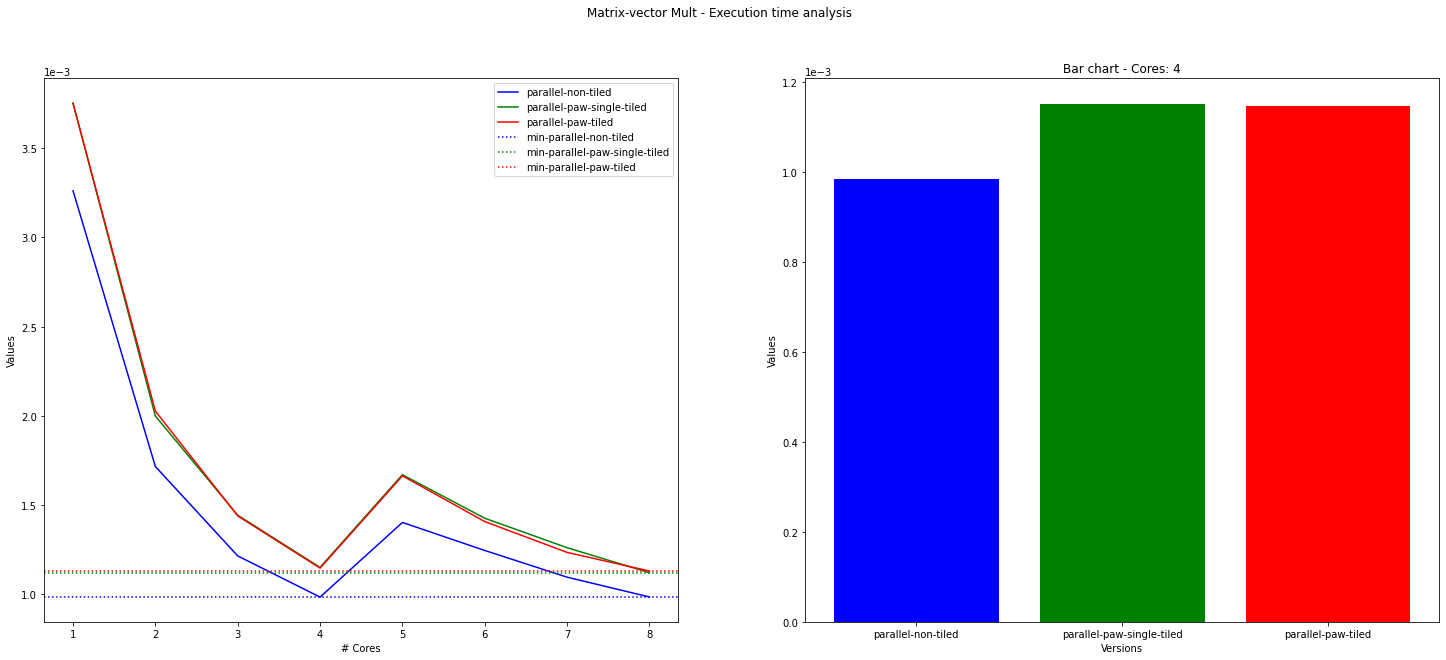

In [145]:
plot_experiments('Matrix-vector Mult - Execution time',group_mean(df_vm_ex))

# Jacobi

## Analysis

### Cache misses

In [146]:
df_jb_cache = filter_by_experiment('jacobi','cache-misses')
df_jb_cache


,algorithm,version,cores,experiment,N,M,value
6,jacobi,parallel-paw-single-tiled,1,cache-misses,1200,1200,289776.0
7,jacobi,parallel-non-tiled,1,cache-misses,1200,1200,285685.0
8,jacobi,parallel-paw-tiled,1,cache-misses,1200,1200,284324.0
15,jacobi,parallel-paw-single-tiled,2,cache-misses,1200,1200,315086.0
16,jacobi,parallel-non-tiled,2,cache-misses,1200,1200,161091.0
...,...,...,...,...,...,...,...
925,jacobi,parallel-non-tiled,7,cache-misses,1200,1200,37691.0
926,jacobi,parallel-paw-tiled,7,cache-misses,1200,1200,288563.0
933,jacobi,parallel-paw-single-tiled,8,cache-misses,1200,1200,311292.0
934,jacobi,parallel-non-tiled,8,cache-misses,1200,1200,37485.0


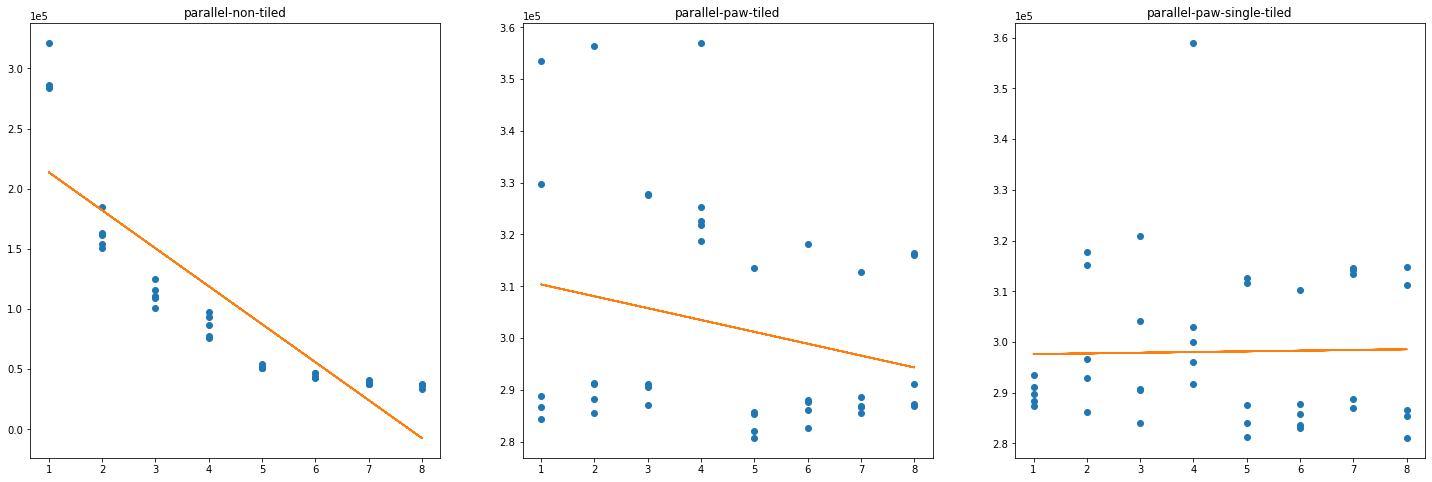

In [148]:
exp = get_experimental_values(df_jb_cache)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

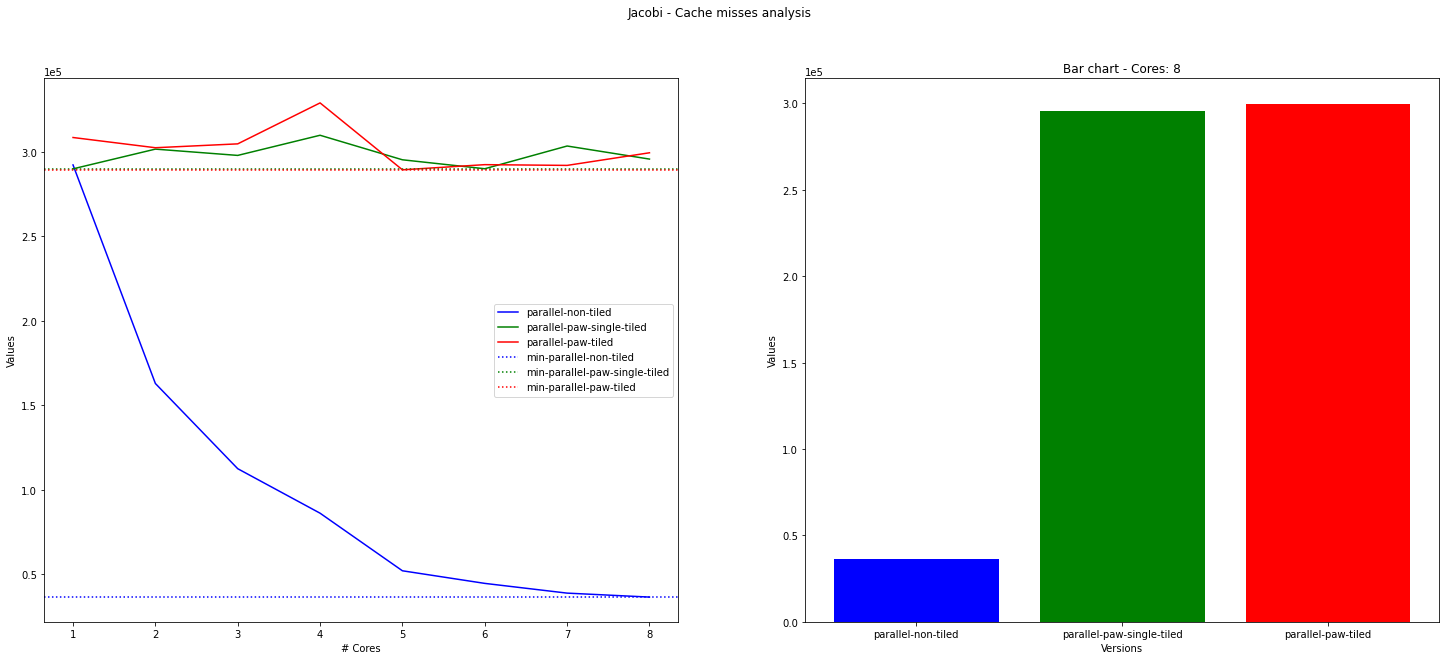

In [149]:
plot_experiments('Jacobi - Cache misses',group_mean(df_jb_cache))

### Total of instructions executed

In [150]:
df_jb_ti = filter_by_experiment('jacobi','total-instructions')
df_jb_ti

,algorithm,version,cores,experiment,N,M,value
78,jacobi,parallel-non-tiled,1,total-instructions,1200,1200,122005549.0
79,jacobi,parallel-paw-tiled,1,total-instructions,1200,1200,130636001.0
80,jacobi,parallel-paw-single-tiled,1,total-instructions,1200,1200,122016371.0
87,jacobi,parallel-non-tiled,2,total-instructions,1200,1200,61025109.0
88,jacobi,parallel-paw-tiled,2,total-instructions,1200,1200,130643099.0
...,...,...,...,...,...,...,...
997,jacobi,parallel-paw-tiled,7,total-instructions,1200,1200,130647553.0
998,jacobi,parallel-paw-single-tiled,7,total-instructions,1200,1200,122027832.0
1005,jacobi,parallel-non-tiled,8,total-instructions,1200,1200,15296561.0
1006,jacobi,parallel-paw-tiled,8,total-instructions,1200,1200,130648934.0


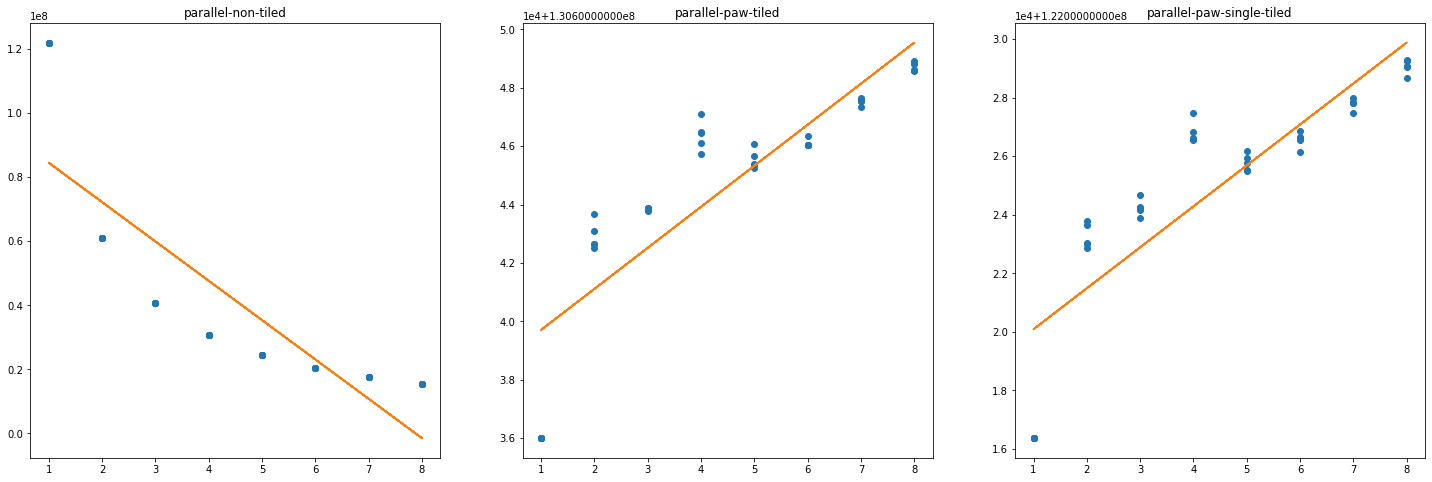

In [151]:
exp = get_experimental_values(df_jb_ti)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

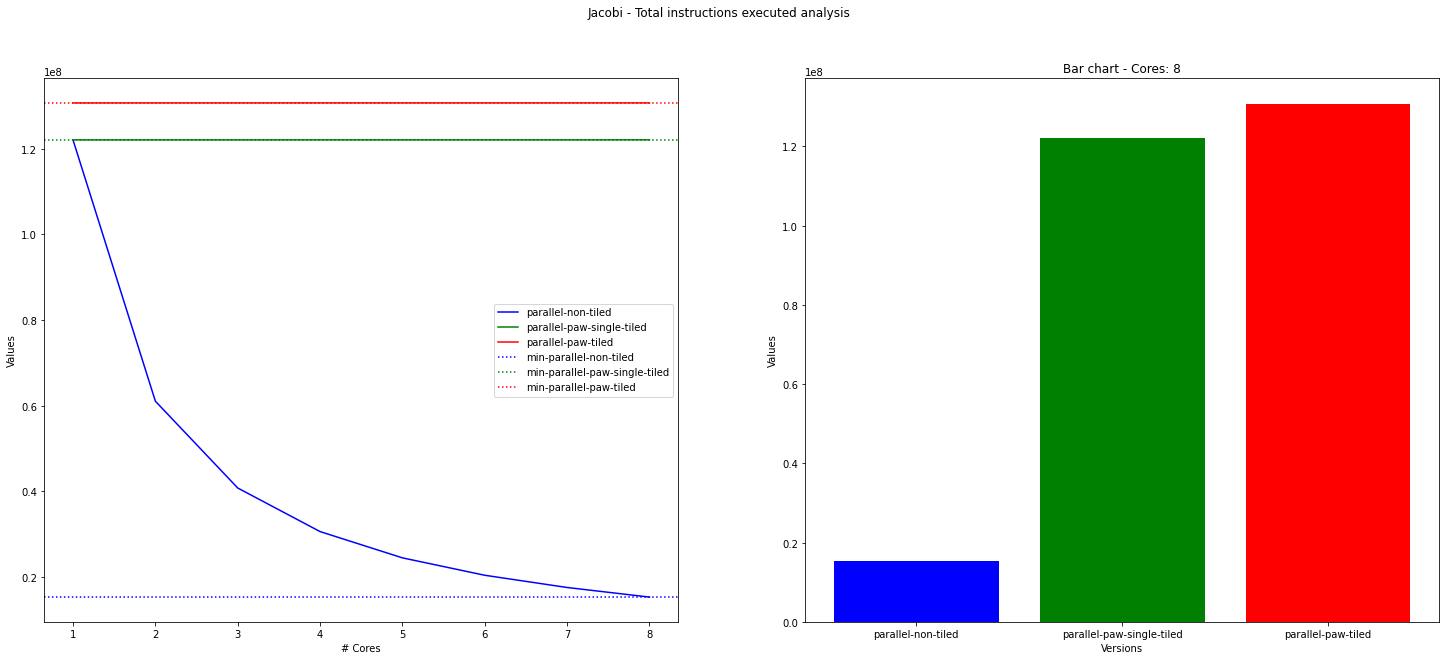

In [152]:
plot_experiments('Jacobi - Total instructions executed',group_mean(df_jb_ti))

### Execution time

In [153]:
df_jb_ex = filter_by_experiment('jacobi','speed-up')
df_jb_ex

,algorithm,version,cores,experiment,N,M,value
150,jacobi,parallel-paw-single-tiled,1,speed-up,1200,1200,0.012021
151,jacobi,parallel-non-tiled,1,speed-up,1200,1200,0.011889
152,jacobi,parallel-paw-tiled,1,speed-up,1200,1200,0.012453
159,jacobi,parallel-paw-single-tiled,2,speed-up,1200,1200,0.006267
160,jacobi,parallel-non-tiled,2,speed-up,1200,1200,0.006117
...,...,...,...,...,...,...,...
1069,jacobi,parallel-non-tiled,7,speed-up,1200,1200,0.003583
1070,jacobi,parallel-paw-tiled,7,speed-up,1200,1200,0.005797
1077,jacobi,parallel-paw-single-tiled,8,speed-up,1200,1200,0.005491
1078,jacobi,parallel-non-tiled,8,speed-up,1200,1200,0.003245


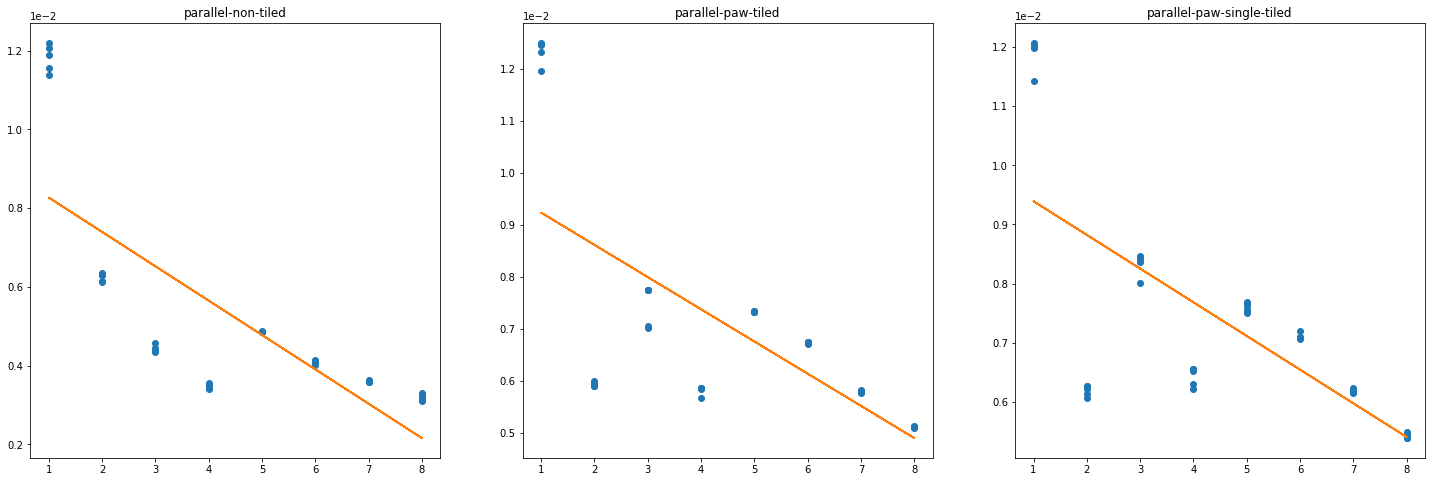

In [155]:
exp = get_experimental_values(df_jb_ex)
plot_exp = get_plottable_experiment(exp)
plot_scatter(plot_exp, tick_format_style='sci')

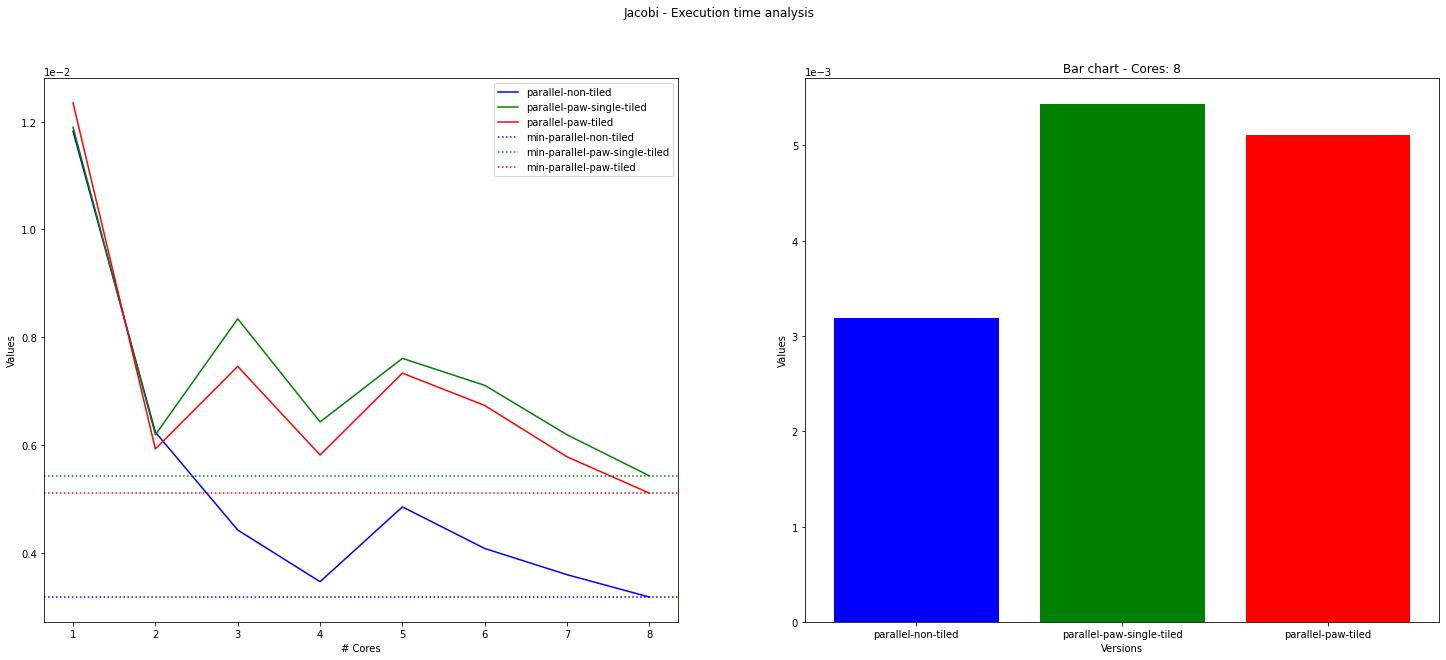

In [156]:
plot_experiments('Jacobi - Execution time',group_mean(df_jb_ex))

# Conclusions

- It looks like the effectivity is context-based.  For example, we could see some improvement over the cache hits and performance in the **matrix** and **vector-matrix** multiplication algorithms but it not the same case for the **jacobi** algorithm.